In [1]:
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

cosmos = Table.read(catalog_path+'cosmos.zbest.v4.1.5.fits')
print(cosmos)

      ID       ... GALFIT_RATIO_F160W
-------------- ... ------------------
1.0 .. 33879.0 ...   -99.0 .. 0.91667


In [9]:
cosmos.colnames

['ID',
 'ID_SPEC',
 'FIELD',
 'RA',
 'DEC',
 'X',
 'Y',
 'Z_BEST',
 'Z_TYPE',
 'Z_SPEC',
 'Z_PHOT',
 'Z_GRISM',
 'F_F140',
 'E_F140',
 'MAG_F140',
 'F_F160',
 'E_F160',
 'MAG_F160',
 'LMASS',
 'AV',
 'LAGE',
 'LSFR',
 'LSSFR',
 'FLUX_RADIUS',
 'UV',
 'VJ',
 'UVJ',
 'RE_F140',
 'E_RE_F140',
 'N_F140',
 'E_N_F140',
 'Q_F140',
 'E_Q_F140',
 'RE_F160',
 'E_RE_F160',
 'N_F160',
 'E_N_F160',
 'Q_F160',
 'E_Q_F160',
 'RE_F125',
 'E_RE_F125',
 'N_F125',
 'E_N_F125',
 'Q_F125',
 'E_Q_F125',
 'MAG_F814',
 'USE',
 'FLAG_F125',
 'FLAG_F140',
 'FLAG_F160',
 'GALFIT_RATIO_F125W',
 'GALFIT_RATIO_F140W',
 'GALFIT_RATIO_F160W']

In [15]:
selection= (cosmos['USE'] == 1) & (cosmos['Z_BEST']>1.8) & (cosmos['Z_BEST']<2.2) & (cosmos['MAG_F160']<26.5)

uv = cosmos['UV'][selection]
vj = cosmos['VJ'][selection]
print(len(uv))

2498


Text(0, 0.5, 'U-V')

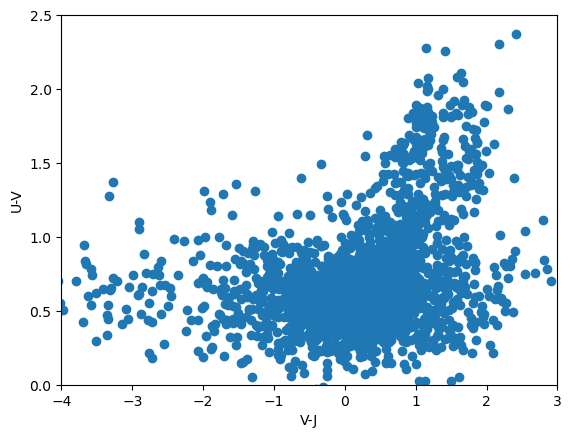

In [16]:
plt.scatter(vj,uv)
plt.xlim(-4,3)
plt.ylim(0,2.5)
plt.xlabel('V-J')
plt.ylabel('U-V')

In [20]:
from astropy.io import ascii

cosmos_sfr = ascii.read(catalog_path+'cosmos_3dhst.v4.1.5.zbest.sfr',
data_start=0,header_start=0,delimiter=' ')
print(cosmos_sfr)

  ID    sfr    sfr_IR   sfr_UV   ... ef24tot     L_1600         L_2800      beta
----- ------- ------- ---------- ... ------- -------------- -------------- -----
    1  214.34  206.45     7.8873 ...   29.22   3306500000.0  21927000000.0  2.37
    2  191.43  181.25     10.182 ...   33.61   8262000000.0  28308000000.0  1.19
    3  2.4763  1.3982     1.0782 ...   31.62   1622200000.0   2997400000.0 -0.06
    4  306.65  304.82     1.8354 ...   41.84   7822800000.0   5102500000.0 -1.78
    5   -99.0   -99.0  0.0036845 ...   27.12        78668.0     10243000.0  8.89
    6   -99.0   -99.0  0.0076811 ...    23.8     14203000.0     21354000.0  1.11
    7   -99.0   -99.0    0.20115 ...   33.91    139400000.0    559220000.0  1.06
    8   -99.0   -99.0   0.042787 ...   33.25     90102000.0    118950000.0 -0.37
    9   -99.0   -99.0   0.085605 ...    25.6    117150000.0    237990000.0 -0.01
   10   -99.0   -99.0     0.3596 ...   36.49    219220000.0    999730000.0  2.03
  ...     ...     ...       

In [21]:
cosmos_sfr.colnames

['ID',
 'sfr',
 'sfr_IR',
 'sfr_UV',
 'L_IR',
 'L_UV',
 'flag',
 'z_best',
 'z_type',
 'f24tot',
 'ef24tot',
 'L_1600',
 'L_2800',
 'beta']

In [24]:
cosmos_selection = (cosmos['USE'] == 1) & (cosmos['Z_BEST']>1.8) & (cosmos['Z_BEST']<2.2) & (cosmos['MAG_F160']<26.5) & (cosmos_sfr['sfr']>0)
print(cosmos_sfr['sfr'][cosmos_selection[0]])

 sfr  
------
147.31
11.593
17.097
14.408
42.476
15.527
7.6612
10.627
54.593
41.978
   ...
26.113
11.914
2.9159
 12.86
25.767
8.7395
9.8323
 8.593
10.616
96.386
5.9362
Length = 1455 rows


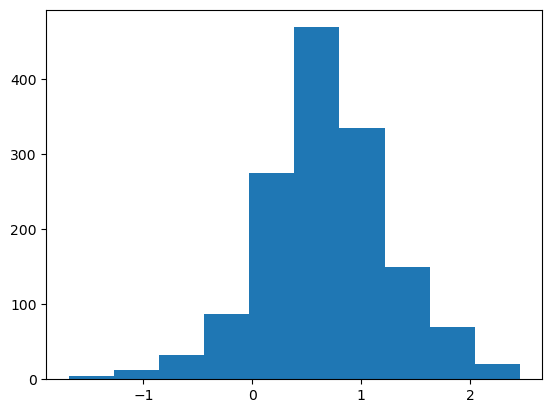

In [26]:
ssfr_cosmos = log10(cosmos_sfr['sfr'][cosmos_selection[0]])-cosmos['LMASS'][cosmos_selection]+9. 
n,bins,patches = plt.hist(ssfr_cosmos)

Text(0, 0.5, 'U-V')

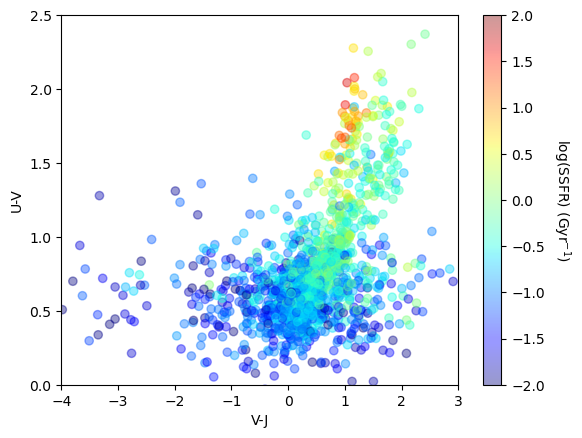

In [27]:
uv_cosmos = cosmos['UV'][cosmos_selection]
vj_cosmos = cosmos['VJ'][cosmos_selection]
plt.scatter(vj_cosmos,uv_cosmos,c=-ssfr_cosmos, vmin=-2,vmax=2,cmap='jet',alpha=0.4)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('log(SSFR) (Gyr$^{-1}$)',rotation=270,labelpad=20)
plt.xlim(-4,3)
plt.ylim(0,2.5)
plt.xlabel('V-J')
plt.ylabel('U-V')

In [28]:
aegis = Table.read(catalog_path+'aegis.zbest.v4.1.5.fits')
aegis_sfr = ascii.read(catalog_path+'aegis_3dhst.v4.1.5.zbest.sfr',
data_start=0,header_start=0,delimiter=' ')
aegis_selection= (aegis['USE'] == 1) & (aegis['Z_BEST']>1.8) & (aegis['Z_BEST']<2.2) & (aegis['MAG_F160']<26.5) & (aegis_sfr['sfr']>0)
uv_aegis = aegis['UV'][aegis_selection]
vj_aegis = aegis['VJ'][aegis_selection]
ssfr_aegis = log10(aegis_sfr['sfr'][aegis_selection[0]])-aegis['LMASS'][aegis_selection]+9.
uv = concatenate([uv_aegis.data,uv_cosmos.data])
vj = concatenate([vj_aegis.data,vj_cosmos.data])
ssfr = concatenate([ssfr_aegis.data,ssfr_cosmos.data])

In [32]:
uds = Table.read(catalog_path+'uds.zbest.v4.1.5.fits')
uds_sfr = ascii.read(catalog_path+'uds_3dhst.v4.1.5.zbest.sfr',
data_start=0,header_start=0,delimiter=' ')
uds_selection= (uds['USE'] == 1) & (uds['Z_BEST']>1.8) & (uds['Z_BEST']<2.2) & (uds['MAG_F160']<26.5) & (uds_sfr['sfr']>0)
uv_uds = uds['UV'][uds_selection]
vj_uds = uds['VJ'][uds_selection]
ssfr_uds = log10(uds_sfr['sfr'][uds_selection[0]])-uds['LMASS'][uds_selection]+9.
goodss = Table.read(catalog_path+'goodss.zbest.v4.1.5.fits')
goodss_sfr = ascii.read(catalog_path+'goodss_3dhst.v4.1.5.zbest.sfr',data_start=0,header_start=0,delimiter=' ')
goodss_selection= (goodss['USE'] == 1) & (goodss['Z_BEST']>1.8) & (goodss['Z_BEST']<2.2) & (goodss['MAG_F160']<26.5) & (goodss_sfr['sfr']>0)
uv_goodss = goodss['UV'][goodss_selection]
vj_goodss = goodss['VJ'][goodss_selection]
ssfr_goodss = log10(goodss_sfr['sfr'][goodss_selection[0]])-goodss['LMASS'][goodss_selection]+9.
goodsn = Table.read(catalog_path+'goodsn.zbest.v4.1.5.fits')
goodsn_sfr = ascii.read(catalog_path+'goodsn_3dhst.v4.1.5.zbest.sfr',data_start=0,header_start=0,delimiter=' ')
goodsn_selection= (goodsn['USE'] == 1) & (goodsn['Z_BEST']>1.8) & (goodsn['Z_BEST']<2.2) & (goodsn['MAG_F160']<26.5) & (goodsn_sfr['sfr']>0)
uv_goodsn = goodsn['UV'][goodsn_selection]
vj_goodsn = goodsn['VJ'][goodsn_selection]
ssfr_goodsn = log10(goodsn_sfr['sfr'][goodsn_selection[0]])-goodsn['LMASS'][goodsn_selection]+9.
uv = concatenate([uv_cosmos.data,uv_aegis.data,uv_uds.data,uv_goodss.data,uv_goodsn.data])
vj = concatenate([vj_cosmos.data,vj_aegis.data,
vj_uds.data,vj_goodss.data,vj_goodsn.data])
ssfr = concatenate([ssfr_cosmos.data,ssfr_aegis.data,ssfr_uds.data,ssfr_goodss.data, ssfr_goodsn.data])

Text(0, 0.5, 'U-V')

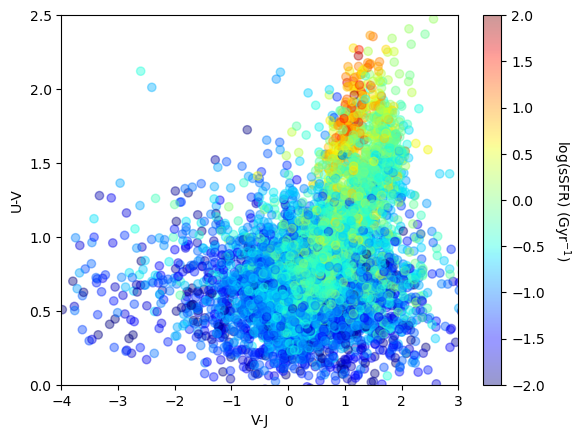

In [34]:
plt.scatter(vj,uv,c=-ssfr,vmin=-2,vmax=2,cmap='jet',alpha=0.4)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('log(sSFR) (Gyr$^{-1}$)',rotation=270,labelpad=20)
plt.xlim(-4,3)
plt.ylim(0,2.5)
plt.xlabel('V-J')
plt.ylabel('U-V')

Text(0, 0.5, 'U-V')

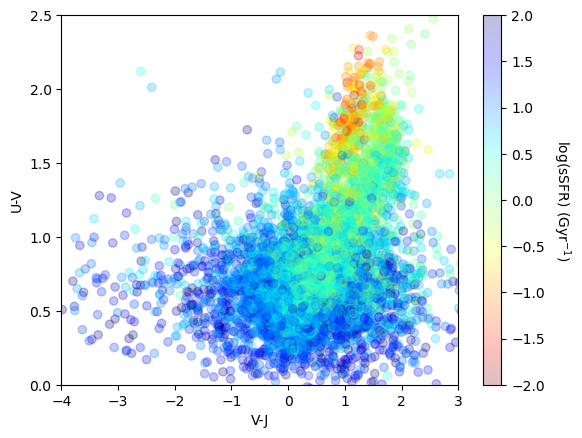

In [35]:
plt.scatter(vj,uv,c=ssfr,vmin=-2,vmax=2,cmap='jet_r',alpha=0.25)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('log(sSFR) (Gyr$^{-1}$)',rotation=270,labelpad=20)
plt.xlim(-4,3)
plt.ylim(0,2.5)
plt.xlabel('V-J')
plt.ylabel('U-V')